Gradient Descent and its variants

Concrete Compressive Strength Data Set


Source: https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

---
By AHMED SHMELS MUHE- 

---

Dataset Exploration and Variables formation

In [ ]:
#Importing the libraries
import pandas as pd 
import numpy as np
from numpy.core.memmap import dtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [ ]:
#If the file is in Google Drive - The below code will mount the google drive

#Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset=pd.read_excel('/content/gdrive/MyDrive/Machine learning for engineering for science application./Concrete_Data.xls')
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
#Print the first 5 rows
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
#Split input and output
#All inputs are independent variables (Predictors)
inputs = dataset[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']]
#Output is the dependent variable
output = dataset['Concrete compressive strength(MPa, megapascals) ']

#inputs and output in the above lines are in pandas DataFrame format

In [ ]:
#Seed for the randomState variable
#Random seed is the control for reproducible results. If random seed is changed for every iteration, results will be different for every iteration. 
#(For further reading: https://medium.com/mlearning-ai/what-the-heck-is-random-state-24a7a8389f3d)
rng = np.random.RandomState(0)

In [ ]:
#Splitting the dataset
#80% of the data is used for training and 20% for testing
input_train, input_test, output_train, output_test = train_test_split(inputs, output, test_size = 0.2, random_state = rng, shuffle= True)

In [ ]:
#Typecast all the inputs from DataFrame(Pandas) to Numpy Array to enable Vector Manipulation
input_train_temp = np.asarray( [
    input_train['Cement (component 1)(kg in a m^3 mixture)'],
    input_train['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'],
    input_train['Fly Ash (component 3)(kg in a m^3 mixture)'],
    input_train['Water  (component 4)(kg in a m^3 mixture)'],
    input_train['Superplasticizer (component 5)(kg in a m^3 mixture)'],
    input_train['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'],
    input_train['Fine Aggregate (component 7)(kg in a m^3 mixture)'],
    input_train[ 'Age (day)']
])

input_test_temp = np.asarray( [
    input_test['Cement (component 1)(kg in a m^3 mixture)'],
    input_test['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'],
    input_test['Fly Ash (component 3)(kg in a m^3 mixture)'],
    input_test['Water  (component 4)(kg in a m^3 mixture)'],
    input_test['Superplasticizer (component 5)(kg in a m^3 mixture)'],
    input_test['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'],
    input_test['Fine Aggregate (component 7)(kg in a m^3 mixture)'],
    input_test[ 'Age (day)']
])

In [ ]:
# Adding x0=1 to each instance
# add a column of ones as integer data type to represent the intercept since it has no 
input_train_vector = np.append(arr = np.ones((1, input_train_temp.shape[1])).astype(int), values = input_train_temp, axis = 0).T
input_test_vector = np.append(arr = np.ones((1, input_test_temp.shape[1])).astype(int), values = input_test_temp, axis = 0).T

In [ ]:
#Accessing the underlying numpy array from the pandas dataframe
# Convert  target variable array from 1d to 2d.
output_train_vector = output_train.values.reshape(-1, 1)
output_test_vector = output_test.values.reshape(-1, 1)

---

Gradient Descent

In [ ]:
#Helper Functions
#Prediction Function Template
def create_function(theta):
    def f(X_b):
        return np.dot(X_b,theta)
    return f

#Compute Mean Square Error
def mse(y, y_predicted):
    error = y-y_predicted
    loss = 1/(y.size) * np.dot(error.T, error)
    return loss

#Compute Weights
def compute_weights(X,y,y_predicted):
    return -(2/y.size) * sum(np.dot(X.T,(y - y_predicted)))

# Batch Gradient Descent - Python Implementation

\
Batch Gradient Descent - Type of gradient descent which processes all the training examples for each iteration of gradient descent

Batch Gradient Descent without Input Data Normalization

In [ ]:
#Gradient Descent 
def batch_gradient_descent(x, y, theta, criterion, number_of_iterations, learning_rate, print_execution_status = True):
    loss_history=[] #Loss history tracker
    gradient = np.zeros([9,1]) #Gradient output 

    for i in range(number_of_iterations):
        # predict and calculate loss
        f = create_function(theta) # create the current function
        y_predicted = f(x) # predict our entire x
        loss = criterion(y,y_predicted) # calculate the error
        loss_history.append(loss[0])

        #perform optimization
        for j in range(0, theta.shape[0]):
          weight = compute_weights(x[:,j].reshape(-1, 1),y,y_predicted) #calculate weight for whole examples every iteration
          gradient[j] = weight

        theta = theta - learning_rate * gradient #adjust m and b

        if i%1000==0 and print_execution_status:
            print("Current Epoch: {}, Current Loss: {}".format(i,loss[0]))
   
    return theta,loss_history

In [ ]:
theta = np.zeros([9,1])
num_epochs = 15000
learning_rate = 1e-7
ideal_theta, loss_history = batch_gradient_descent(input_train_vector, output_train_vector, theta, mse, num_epochs, learning_rate)

Current Epoch: 0, Current Loss: [1585.52485081]
Current Epoch: 1000, Current Loss: [165.84906011]
Current Epoch: 2000, Current Loss: [143.29330252]
Current Epoch: 3000, Current Loss: [132.6504432]
Current Epoch: 4000, Current Loss: [126.62141686]
Current Epoch: 5000, Current Loss: [122.75454588]
Current Epoch: 6000, Current Loss: [120.04958992]
Current Epoch: 7000, Current Loss: [118.05454469]
Current Epoch: 8000, Current Loss: [116.53927758]
Current Epoch: 9000, Current Loss: [115.37051656]
Current Epoch: 10000, Current Loss: [114.46183408]
Current Epoch: 11000, Current Loss: [113.7524388]
Current Epoch: 12000, Current Loss: [113.19738341]
Current Epoch: 13000, Current Loss: [112.76250104]
Current Epoch: 14000, Current Loss: [112.42143929]


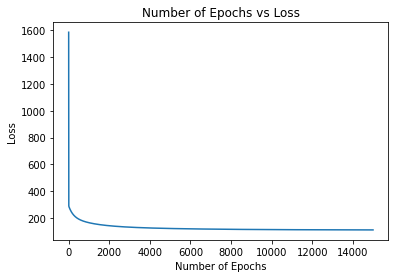

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
plt.plot(np.arange(num_epochs),loss_history)

In [ ]:
print("Ideal Theta: ", ideal_theta)

Ideal Theta:  [[-9.73609710e-05]
 [ 1.15948115e-01]
 [ 1.02515047e-01]
 [ 9.22643372e-02]
 [-1.75237309e-01]
 [ 4.19771109e-02]
 [ 6.49549331e-03]
 [ 1.40655231e-02]
 [ 1.10748370e-01]]


In [ ]:
ideal_function = create_function(ideal_theta)
output_pred = ideal_function(input_test_vector)

In [ ]:
#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': output_pred.flatten()}, index = [*range(0,206)])
bgd_diff.head()

,Actual value,Predicted value
0,26.062193,39.188339
1,10.354551,15.659911
2,79.296635,59.853452
3,74.987410,56.463796
4,9.694722,26.147860


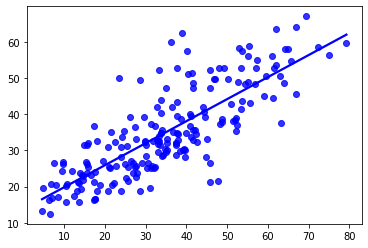

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=output_pred, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), output_pred.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), output_pred.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 64.03
Mean Absolute Error: 7.785944334022886
Mean Square Error: 94.73318052374287
Root Mean Square Error: 9.733097170158267


In [ ]:
#Testing for Different Learning Rates
learning_rates = []
loss_difference = []

for i in [*range(-20, 3)]:
  learning_rate = (10**i)
  learning_rates.append(learning_rate)
  theta = np.zeros([9,1])
  num_epochs = 15000
  ideal_theta, loss_history = batch_gradient_descent(input_train_vector, output_train_vector, theta, mse, num_epochs, learning_rate, print_execution_status= False)
  ideal_prediction_function = create_function(ideal_theta)
  output_predictions = ideal_prediction_function(input_test_vector)
  loss_difference.append(mse(output_test_vector,output_predictions)[0][0])

<ipython-input-15-1c40bcaa8f95>:18: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradient #adjust m and b


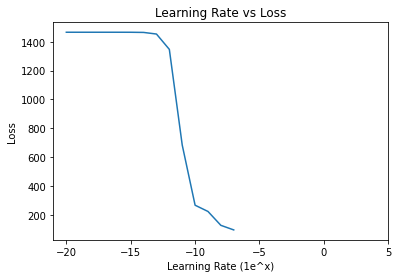

In [ ]:
plt.xlabel("Learning Rate (1e^x)")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.xlim(-21, 5)
plt.plot([*range(-20, 3)],loss_difference)
plt.show()

From the above graph, we can infer that the optimal alpha = 1e-7. The loss is high(NaN - Values are not plotted in the graph) when we increase the learning rate (i.e alpha>1e-6) due to overshooting and the iterations increase if we decrease the learning rate.

---
\
Batch Gradient Descent with Input Data Normalization

In [ ]:
#Normalize the input data
input_train_vector_normalized = input_train_vector/np.max(input_train_vector, axis=0)
input_test_vector_normalized = input_test_vector/np.max(input_test_vector, axis=0)
#Other Methods: sklearn - preprocessing.normalize
#Vector Normalization - norm = V/|V|

In [ ]:
theta = np.zeros([9,1])
num_epochs = 15000
learning_rate = 0.01
ideal_theta, loss_history = batch_gradient_descent(input_train_vector_normalized, output_train_vector, theta, mse, num_epochs, learning_rate)

Current Epoch: 0, Current Loss: [1585.52485081]
Current Epoch: 1000, Current Loss: [164.89736092]
Current Epoch: 2000, Current Loss: [135.8232991]
Current Epoch: 3000, Current Loss: [125.65865745]
Current Epoch: 4000, Current Loss: [121.28669176]
Current Epoch: 5000, Current Loss: [118.94152575]
Current Epoch: 6000, Current Loss: [117.41968]
Current Epoch: 7000, Current Loss: [116.29712801]
Current Epoch: 8000, Current Loss: [115.40765983]
Current Epoch: 9000, Current Loss: [114.67682905]
Current Epoch: 10000, Current Loss: [114.06546621]
Current Epoch: 11000, Current Loss: [113.54935977]
Current Epoch: 12000, Current Loss: [113.11151349]
Current Epoch: 13000, Current Loss: [112.73897237]
Current Epoch: 14000, Current Loss: [112.4213849]


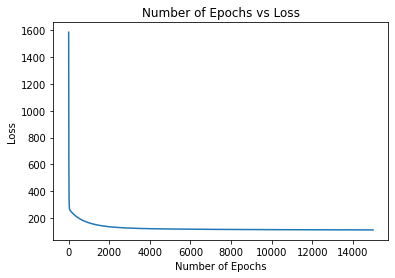

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
plt.plot(np.arange(num_epochs),loss_history)

In [ ]:
print("Ideal Theta: ", ideal_theta)

Ideal Theta:  [[  4.59525179]
 [ 53.58277596]
 [ 30.19478783]
 [ 12.08097456]
 [-33.14668739]
 [ 17.56923571]
 [ 10.0943578 ]
 [  1.58405989]
 [ 40.33664542]]


In [ ]:
ideal_function = create_function(ideal_theta)
output_pred = ideal_function(input_test_vector_normalized)

In [ ]:
#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': output_pred.flatten()}, index = [*range(0,206)])
bgd_diff.head()

,Actual value,Predicted value
0,26.062193,38.680037
1,10.354551,17.584658
2,79.296635,62.489906
3,74.987410,49.289117
4,9.694722,26.843605


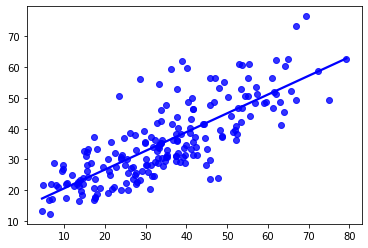

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=output_pred, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), output_pred.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), output_pred.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 61.76
Mean Absolute Error: 8.033562956870222
Mean Square Error: 100.71361519789697
Root Mean Square Error: 10.035617330184376


In [ ]:
#Testing for Different Learning Rates
learning_rates = []
loss_difference = []

for i in [*range(-10, 10)]:
  learning_rate = (10**i)
  learning_rates.append(learning_rate)
  theta = np.zeros([9,1])
  num_epochs = 15000
  ideal_theta, loss_history = batch_gradient_descent(input_train_vector_normalized, output_train_vector, theta, mse, num_epochs, learning_rate, print_execution_status= False)
  ideal_prediction_function = create_function(ideal_theta)
  output_predictions = ideal_prediction_function(input_test_vector_normalized)
  loss_difference.append(mse(output_test_vector,output_predictions)[0][0])

<ipython-input-15-1c40bcaa8f95>:18: RuntimeWarning: overflow encountered in multiply
  theta = theta - learning_rate * gradient #adjust m and b


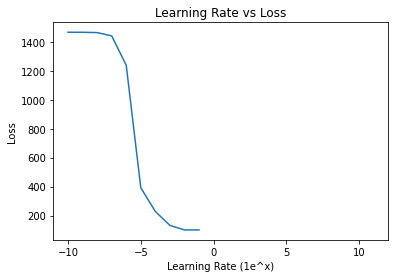

In [ ]:
plt.xlabel("Learning Rate (1e^x)")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.xlim(-11, 12)
plt.plot([*range(-10, 10)],loss_difference)
plt.show()

From the above graph, we can infer that the optimal alpha = 0.01. The loss is high(NaN - Values are not plotted in the graph) when we increase the learning rate (i.e alpha>0.01) due to overshooting and the iterations increase if we decrease the learning rate.

# Batch Gradient Descent - Pytorch Implementation

Batch Gradient Descent without Input Data Normalization

In [ ]:
import torch
import torch.nn.functional as F
import random

In [ ]:
class GradientDescent(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(GradientDescent, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.predict = torch.nn.Linear(n_hidden, n_output)  

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)             
        return x

criterion = torch.nn.MSELoss()

def setRandomState():
  random.seed(160)
  torch.manual_seed(160)
  torch.cuda.manual_seed(160)
  np.random.seed(160)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

In [ ]:
#Convert Numpy to Tensor
input_train_tensor = torch.from_numpy(np.float32(input_train_vector))
output_train_tensor = torch.from_numpy(np.float32(output_train_vector))

In [ ]:
net_all = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
optimizer_all = torch.optim.SGD(net_all.parameters(), lr=1e-6)
setRandomState()

loss_list = []
for t in range(300):
    prediction = net_all(input_train_tensor)   
    loss = criterion(prediction, output_train_tensor)
    loss_list.append(loss)
    optimizer_all.zero_grad()
    loss.backward()
    optimizer_all.step()
    print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="")

epoch: 299	Loss =  261.230

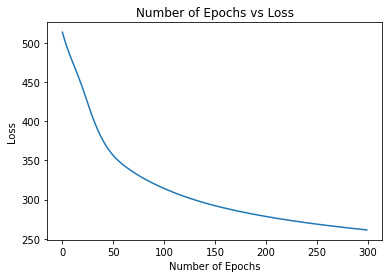

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
with torch.no_grad():
  plt.plot([*range(300)],loss_list)

In [ ]:
#Convert Numpy to Tensor
input_test_tensor = torch.from_numpy(np.float32(input_test_vector))
output_test_tensor = torch.from_numpy(np.float32(output_test_vector))

#Predict the output
prediction = net_all(input_test_tensor)   

In [ ]:
from torch.autograd import Variable
prediction = Variable(prediction, requires_grad=True)
prediction = prediction.detach().numpy()

#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': prediction.flatten()}, index = [*range(0,206)])
bgd_diff.head(5)

,Actual value,Predicted value
0,26.062193,34.982037
1,10.354551,40.731724
2,79.296635,44.412663
3,74.987410,43.814442
4,9.694722,43.530010


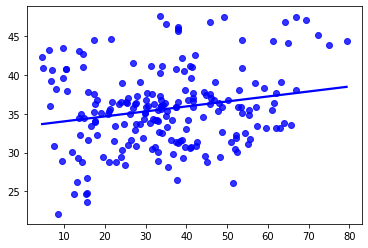

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=prediction, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), prediction.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), prediction.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 2.79
Mean Absolute Error: 12.973734637644307
Mean Square Error: 256.04445990515444
Root Mean Square Error: 16.00138931171773


In [ ]:
#Testing for Different Learning Rates
learning_rates = []
loss_difference = []

for i in [*range(-25, -4)]:
  learning_rate = (10**i)
  learning_rates.append(learning_rate)
  net_all = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
  optimizer_all = torch.optim.SGD(net_all.parameters(), lr= learning_rate)
  setRandomState()
  for t in range(200):
      predictions = net_all(input_train_tensor)   
      loss = criterion(predictions, output_train_tensor)
      optimizer_all.zero_grad()
      loss.backward()
      optimizer_all.step()
      print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="") 
  out_prediction = net_all(input_test_tensor) 
  out_loss = criterion(out_prediction, output_test_tensor)
  loss_difference.append(out_loss)

epoch: 199	Loss =  1570.204

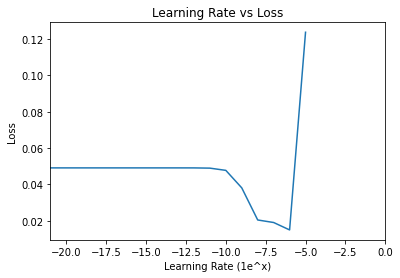

In [ ]:
normalized_loss = [float(i)/sum(loss_difference) for i in loss_difference]
plt.xlabel("Learning Rate (1e^x)")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.xlim(-21, 0)
with torch.no_grad():
  plt.plot([*range(-25, -4)], normalized_loss)
  plt.show()

From the above graph, we can infer that the optimal alpha = 1e-6. The loss is high(NaN - Values are not plotted in the graph) when we increase the learning rate (i.e alpha>1e-6) due to overshooting and the iterations increase if we decrease the learning rate.

---
\
Batch Gradient Descent with Input data normalization

In [ ]:
#Convert Numpy to Tensor
input_test_tensor_normalized = torch.from_numpy(np.float32(input_test_vector_normalized))
input_train_tensor_normalized = torch.from_numpy(np.float32(input_train_vector_normalized))

In [ ]:
net_all = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
optimizer_all = torch.optim.SGD(net_all.parameters(), lr=1e-3)
setRandomState()


loss_list = []
for t in range(800):
    prediction_norm = net_all(input_train_tensor_normalized)   
    loss = criterion(prediction_norm, output_train_tensor)
    loss_list.append(loss)
    optimizer_all.zero_grad()
    loss.backward()
    optimizer_all.step()
    print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="")

epoch: 799	Loss =  120.306

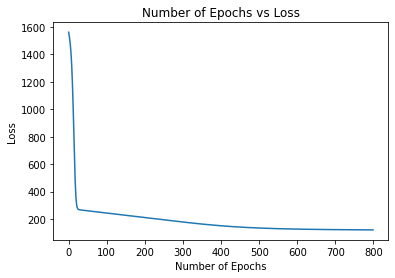

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
with torch.no_grad():
  plt.plot([*range(800)],loss_list)

In [ ]:
#Predict the output
prediction_norm = net_all(input_test_tensor_normalized)   

In [ ]:
from torch.autograd import Variable
prediction_norm = Variable(prediction_norm, requires_grad=True)
prediction_norm = prediction_norm.detach().numpy()

#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': prediction_norm.flatten()}, index = [*range(0,206)])
bgd_diff.head(5)

,Actual value,Predicted value
0,26.062193,37.772404
1,10.354551,18.854792
2,79.296635,60.123581
3,74.987410,43.710434
4,9.694722,25.689634


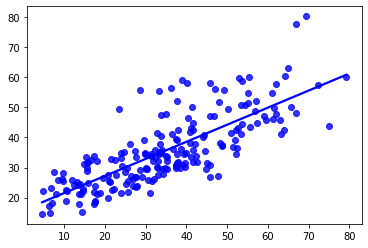

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=prediction_norm, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), prediction_norm.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), prediction_norm.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), prediction_norm.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), prediction_norm.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 59.81
Mean Absolute Error: 8.22388199114219
Mean Square Error: 105.84544702038853
Root Mean Square Error: 10.288121646850241


In [ ]:
#Testing for Different Learning Rates
learning_rates = []
loss_difference = []

for i in [*range(-25, 0)]:
  learning_rate = (10**i)
  learning_rates.append(learning_rate)
  net_all = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
  optimizer_all = torch.optim.SGD(net_all.parameters(), lr= learning_rate)
  setRandomState()
  for t in range(200):
      prediction = net_all(input_train_tensor_normalized)   
      loss = criterion(prediction, output_train_tensor)
      optimizer_all.zero_grad()
      loss.backward()
      optimizer_all.step()
      print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="") 
  out_prediction = net_all(input_test_tensor_normalized) 
  out_loss = criterion(out_prediction, output_test_tensor)
  loss_difference.append(out_loss)

epoch: 199	Loss =  282.265

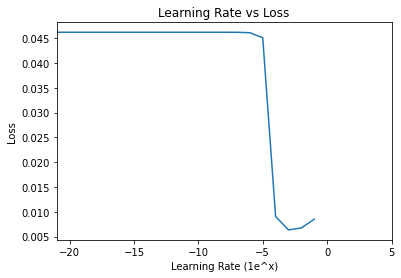

In [ ]:
normalized_loss = [float(i)/sum(loss_difference) for i in loss_difference]
plt.xlabel("Learning Rate (1e^x)")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.xlim(-21, 5)
with torch.no_grad():
  plt.plot([*range(-25, 0)], normalized_loss)
  plt.show()

From the above graph, we can infer that the optimal alpha = 1e-3. The loss is high(NaN - Values are not plotted in the graph) when we increase the learning rate (i.e alpha>1e-3) due to overshooting and the iterations increase if we decrease the learning rate.

---
\
**Metrics Comparison**

                                            Batch Gradient Descent   
    ** Python Implementation **                                 
                                      Without Normalization                  With Normalization
    R squared                                64.04                                61.77
    Mean Absolute Error                     7.78522                              8.03249
    Mean Square Error                      94.717918                            100.09250
    Root Mean Square Error                 10.03456                              9.7323131

    ** Pytorch Implementation **
                                      Without Normalization                  With Normalization
    R squared                                59.98                                59.82
    Mean Absolute Error                     8.040053                              8.22293
    Mean Square Error                      105.416702                            105.819803
    Root Mean Square Error                 10.26726                              10.28687    

# Stochastic Gradient Descent - Python Implementation

Stochastic Gradient Descent - Type of gradient descent which processes 1 training example per iteration

Stochastic Gradient Descent with Input Data Normalization

In [ ]:
def stochastic_gradient_descent(x, y, theta, criterion, number_of_iterations, learning_rate, print_execution_status = True, features = 9):
    loss_history=[] #Loss history tracker
    gradient = np.zeros([features,1]) #Gradient output 

    for i in range(number_of_iterations):
      for j in range(x.shape[0]):
        # predict and calculate loss
        f = create_function(theta) # create the current function
        x_point = x[j].reshape(-1, 1) #Consider one sample
        y_point = y[j].reshape(-1, 1)
        y_predicted = f(x_point.T) # predict our entire x
        
        #perform optimization
        for k in range(features):
          weight = compute_weights(x_point[k,:],y_point,y_predicted) #compute weight for every sample
          gradient[k] = weight
        theta = theta - learning_rate * gradient #adjust m and b

      #Loss Prediction  
      f = create_function(theta) # create the current function
      y_predicted = f(x) # predict our entire x
      loss = criterion(y,y_predicted) # calculate the error
      loss_history.append(loss[0])
      if i%10==0 and print_execution_status:
        print("Current Epoch: {}, Current Loss: {}".format(i,loss[0]))
   
    return theta,loss_history

In [ ]:
theta = np.zeros([9,1])
num_epochs = 200
learning_rate = 0.001
ideal_theta, loss_history = stochastic_gradient_descent(input_train_vector_normalized, output_train_vector, theta, mse, num_epochs, learning_rate)

Current Epoch: 0, Current Loss: [255.47765545]
Current Epoch: 10, Current Loss: [169.84439845]
Current Epoch: 20, Current Loss: [140.89447245]
Current Epoch: 30, Current Loss: [129.16408518]
Current Epoch: 40, Current Loss: [123.72055765]
Current Epoch: 50, Current Loss: [120.79174047]
Current Epoch: 60, Current Loss: [118.96694504]
Current Epoch: 70, Current Loss: [117.68106411]
Current Epoch: 80, Current Loss: [116.6920882]
Current Epoch: 90, Current Loss: [115.8885633]
Current Epoch: 100, Current Loss: [115.21450891]
Current Epoch: 110, Current Loss: [114.63874994]
Current Epoch: 120, Current Loss: [114.14188546]
Current Epoch: 130, Current Loss: [113.71053771]
Current Epoch: 140, Current Loss: [113.33470402]
Current Epoch: 150, Current Loss: [113.0064712]
Current Epoch: 160, Current Loss: [112.71934783]
Current Epoch: 170, Current Loss: [112.46788788]
Current Epoch: 180, Current Loss: [112.24745875]
Current Epoch: 190, Current Loss: [112.05408543]


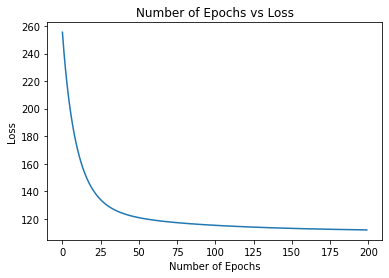

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
with torch.no_grad():
  plt.plot(np.arange(num_epochs),loss_history)

In [ ]:
print("Ideal Theta: ", ideal_theta)

Ideal Theta:  [[  4.38270029]
 [ 54.18099477]
 [ 30.679263  ]
 [ 12.45921916]
 [-34.80792289]
 [ 16.53326659]
 [ 10.67409603]
 [  2.02272488]
 [ 40.32111391]]


In [ ]:
ideal_function = create_function(ideal_theta)
output_pred = ideal_function(input_test_vector_normalized)

In [ ]:
#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': output_pred.flatten()}, index = [*range(0,206)])
bgd_diff.head()

,Actual value,Predicted value
0,26.062193,38.521481
1,10.354551,17.263585
2,79.296635,62.298982
3,74.987410,49.525228
4,9.694722,26.698034


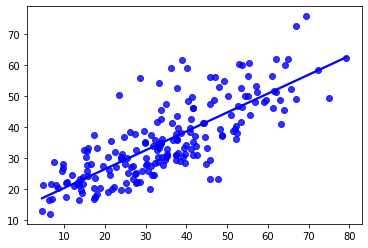

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=output_pred, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), output_pred.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), output_pred.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 62.02
Mean Absolute Error: 8.021294303137985
Mean Square Error: 100.04028404221803
Root Mean Square Error: 10.002013999301242


In [ ]:
#Testing for Different Learning Rates
learning_rates = []
loss_difference = []

for i in [*range(-10, 10)]:
  learning_rate = (10**i)
  learning_rates.append(learning_rate)
  theta = np.zeros([9,1])
  num_epochs = 50
  ideal_theta, loss_history = stochastic_gradient_descent(input_train_vector_normalized, output_train_vector, theta, mse, num_epochs, learning_rate, print_execution_status= False)
  ideal_prediction_function = create_function(ideal_theta)
  output_predictions = ideal_prediction_function(input_test_vector_normalized)
  loss_difference.append(mse(output_test_vector,output_predictions)[0][0])

<ipython-input-55-2b20729aab03>:17: RuntimeWarning: overflow encountered in multiply
  theta = theta - learning_rate * gradient #adjust m and b
<ipython-input-55-2b20729aab03>:17: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradient #adjust m and b


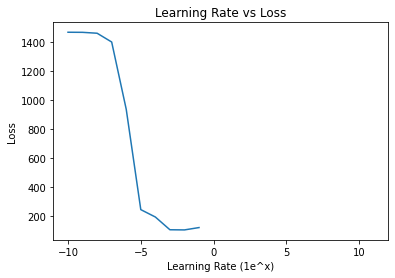

In [ ]:
plt.xlabel("Learning Rate (1e^x)")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.xlim(-11, 12)
with torch.no_grad():
  plt.plot([*range(-10, 10)],loss_difference)
  plt.show()

From the above graph, we can infer that the optimal alpha = 0.001. The loss is high(NaN - Values are not plotted in the graph) when we increase the learning rate (i.e alpha>0.001) due to overshooting and the iterations increase if we decrease the learning rate.

# Stochastic Gradient Descent - Pytorch Implementation

Stochastic Gradient Descent without Input Data Normalization

In [ ]:
def setRandomStateSGD():
  random.seed(113)
  torch.manual_seed(113)
  torch.cuda.manual_seed(113)
  np.random.seed(113)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

In [ ]:
setRandomStateSGD()
net_item = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
optimizer_item = torch.optim.SGD(net_item.parameters(), lr=1e-6)

loss_list = []
for t in range(50):
    for input_i, output_i in zip(input_train_tensor, output_train_tensor):
      pred_i = net_item(input_i)
      loss = criterion(pred_i, output_i)
      loss_list.append(loss)
      optimizer_item.zero_grad()   
      loss.backward()         
      optimizer_item.step()        
      print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="") 

epoch: 49	Loss =  0.960

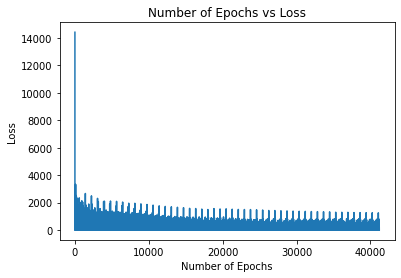

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
with torch.no_grad():
  plt.plot([*range(len(loss_list))],loss_list)

In [ ]:
#Predict the output
prediction = net_item(input_test_tensor)   

In [ ]:
from torch.autograd import Variable
prediction = Variable(prediction, requires_grad=True)
prediction = prediction.detach().numpy()

#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': prediction.flatten()}, index = [*range(0,206)])
bgd_diff.head(5)

,Actual value,Predicted value
0,26.062193,23.950928
1,10.354551,1.779728
2,79.296635,66.633881
3,74.987410,51.134983
4,9.694722,8.650732


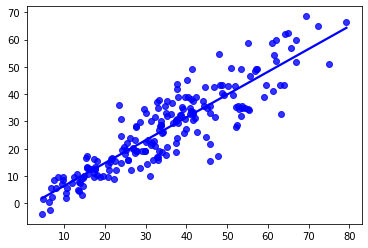

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=prediction, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), prediction.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), prediction.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 57.83
Mean Absolute Error: 8.4815689622613
Mean Square Error: 111.0804049897619
Root Mean Square Error: 10.53946891402797


In [ ]:
#Testing for Different Learning Rates
learning_rates = []
loss_difference = []

for i in [*range(-25, 0)]:
  learning_rate = (10**i)
  learning_rates.append(learning_rate)
  setRandomStateSGD()
  net_item = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
  optimizer_item = torch.optim.SGD(net_item.parameters(), lr=learning_rate)
  for t in range(5):
    for input_i, output_i in zip(input_train_tensor, output_train_tensor):
      pred_i = net_item(input_i)
      loss = criterion(pred_i, output_i)
      optimizer_item.zero_grad()   
      loss.backward()         
      optimizer_item.step()        
      print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="")  
  out_prediction = net_item(input_test_tensor_normalized) 
  out_loss = criterion(out_prediction, output_test_tensor)
  loss_difference.append(out_loss)

epoch: 4	Loss =  544.982

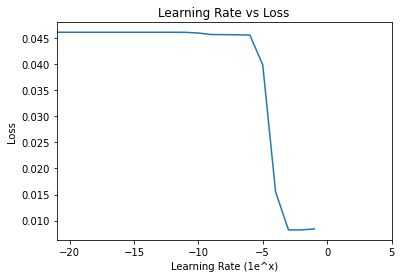

In [ ]:
normalized_loss = [float(i)/sum(loss_difference) for i in loss_difference]
plt.xlabel("Learning Rate (1e^x)")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.xlim(-21, 5)
with torch.no_grad():
  plt.plot([*range(-25, 0)], normalized_loss)
  plt.show()  

From the above graph, we can infer that the optimal alpha = 1e-4. The loss is high(NaN - Values are not plotted in the graph) when we increase the learning rate (i.e alpha>1e-3) due to overshooting and the iterations increase if we decrease the learning rate.

---
\
Stochastic Gradient Descent with Input data normalization

In [ ]:
setRandomStateSGD()
net_item = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
optimizer_item = torch.optim.SGD(net_item.parameters(), lr=0.0001)

loss_list = []
for t in range(50):
    for input_i, output_i in zip(input_train_tensor_normalized, output_train_tensor):
      pred_i = net_item(input_i)
      loss = criterion(pred_i, output_i)
      loss_list.append(loss)
      optimizer_item.zero_grad()   
      loss.backward()         
      optimizer_item.step()        
      print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="") 

epoch: 49	Loss =  94.807

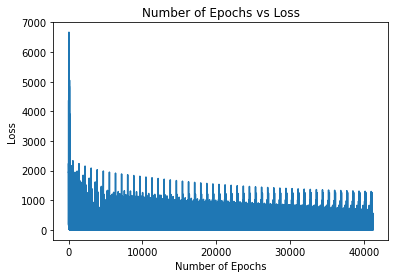

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
with torch.no_grad():
  plt.plot([*range(len(loss_list))],loss_list)

In [ ]:
#Predict the output
prediction = net_item(input_test_tensor_normalized)   

In [ ]:
from torch.autograd import Variable
prediction = Variable(prediction, requires_grad=True)
prediction = prediction.detach().numpy()

#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': prediction.flatten()}, index = [*range(0,206)])
bgd_diff.head(5)

,Actual value,Predicted value
0,26.062193,34.484100
1,10.354551,11.114166
2,79.296635,62.388054
3,74.987410,48.954071
4,9.694722,20.892574


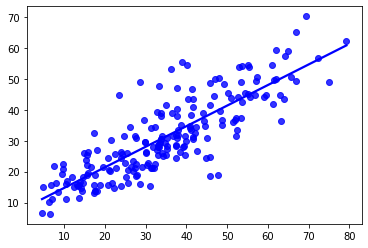

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=prediction, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), prediction.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), prediction.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 64.88
Mean Absolute Error: 7.698332003962724
Mean Square Error: 92.51370894654661
Root Mean Square Error: 9.618404698625787


---
\
**Metrics Comparison**

                                            Stochastic Gradient Descent   
    ** Python Implementation **                                 
                                      With Normalization
    R squared                                62.02
    Mean Absolute Error                     8.02048
    Mean Square Error                      100.0197
    Root Mean Square Error                  10.0009

    ** Pytorch Implementation **
                                      Without Normalization                  With Normalization
    R squared                                58.17                                64.88
    Mean Absolute Error                     8.48794                              7.69682
    Mean Square Error                      110.16101                            92.48927
    Root Mean Square Error                  10.4957                               9.6171    

# Mini-Batch Gradient Descent - Python Implementation


Mini-Batch Gradient Descent -  type of gradient descent in which b examples where b<m are processed per iteration.

In [ ]:
n_obs = input_train_vector.shape[0]
training_input = np.c_[input_train_vector_normalized.reshape(n_obs, -1), output_train_vector.reshape(n_obs, 1)]

In [ ]:
#Gradient Descent 
def mini_batch_gradient_descent(training_data, theta, criterion, number_of_iterations, learning_rate, batch_size, print_execution_status = True):
    loss_history=[] #Loss history tracker
    gradient = np.zeros([9,1]) #Gradient output 

    for i in range(number_of_iterations):
      rng.shuffle(training_data)
      for start in range(0, n_obs, batch_size):
        stop = start + batch_size
        x_batch, y_batch = training_data[start:stop, :-1], training_data[start:stop, -1:]
        # predict and calculate loss
        f = create_function(theta) # create the current function
        y_predicted = f(x_batch) # predict our entire x
        loss = criterion(y_batch,y_predicted) # calculate the error
        loss_history.append(loss[0])

        #perform optimization
        for j in range(0, theta.shape[0]):
          weight = compute_weights(x_batch[:,j].reshape(-1, 1),y_batch,y_predicted) #calculate weight for whole examples every iteration
          gradient[j] = weight

        theta = theta - learning_rate * gradient #adjust m and b

      if i%10==0 and print_execution_status:
        print("Current Epoch: {}, Current Loss: {}".format(i,loss[0]))
   
    return theta,loss_history

In [ ]:
theta = np.zeros([9,1])
num_epochs = 824
learning_rate = 1e-3
batch_size = 16
ideal_theta, loss_history = mini_batch_gradient_descent(training_input, theta, mse, num_epochs, learning_rate, batch_size)

Current Epoch: 0, Current Loss: [1320.5539852]
Current Epoch: 10, Current Loss: [161.42522312]
Current Epoch: 20, Current Loss: [386.81322205]
Current Epoch: 30, Current Loss: [274.63117417]
Current Epoch: 40, Current Loss: [127.53597506]
Current Epoch: 50, Current Loss: [58.09056986]
Current Epoch: 60, Current Loss: [126.77379888]
Current Epoch: 70, Current Loss: [160.55555038]
Current Epoch: 80, Current Loss: [77.11474167]
Current Epoch: 90, Current Loss: [161.01050826]
Current Epoch: 100, Current Loss: [286.41615807]
Current Epoch: 110, Current Loss: [284.31427909]
Current Epoch: 120, Current Loss: [116.89888988]
Current Epoch: 130, Current Loss: [116.08388227]
Current Epoch: 140, Current Loss: [119.57676862]
Current Epoch: 150, Current Loss: [180.55925122]
Current Epoch: 160, Current Loss: [111.36665566]
Current Epoch: 170, Current Loss: [135.37721588]
Current Epoch: 180, Current Loss: [167.11504471]
Current Epoch: 190, Current Loss: [127.43415635]
Current Epoch: 200, Current Loss:

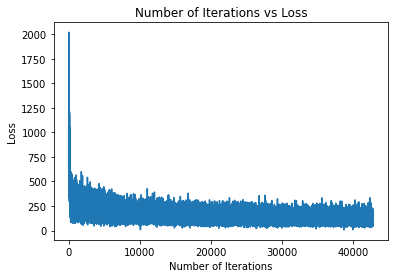

In [ ]:
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Number of Iterations vs Loss")
plt.plot(np.arange(len(loss_history)),loss_history)

In [ ]:
print("Ideal Theta: ", ideal_theta)

Ideal Theta:  [[  6.07879241]
 [ 43.26487969]
 [ 22.06204162]
 [  5.76429367]
 [-13.86518582]
 [ 27.32287816]
 [  4.1240568 ]
 [ -2.16984977]
 [ 34.14470818]]


In [ ]:
ideal_function = create_function(ideal_theta)
output_pred = ideal_function(input_test_vector_normalized)

In [ ]:
#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': output_pred.flatten()}, index = [*range(0,206)])
bgd_diff.head()

,Actual value,Predicted value
0,26.062193,37.938299
1,10.354551,19.698351
2,79.296635,59.199544
3,74.987410,43.620867
4,9.694722,26.320815


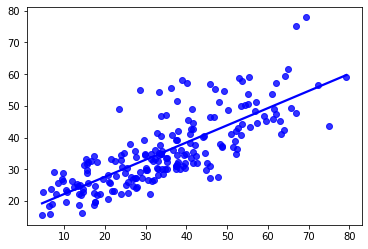

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=output_pred, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), output_pred.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), output_pred.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 59.54
Mean Absolute Error: 8.259756879208178
Mean Square Error: 106.56294684162326
Root Mean Square Error: 10.322933054206215


# Mini-Batch Gradient Descent - Pytorch Implementation

In [ ]:
net_batch = GradientDescent(n_feature=9, n_hidden=9, n_output=1)  
optimizer_batch = torch.optim.SGD(net_batch.parameters(), lr=1e-3) 


batch_size = 16
n_batches = int(len(input_train_tensor_normalized) / batch_size) 

for epoch in range(len(input_train_tensor_normalized)):
    for batch in range(n_batches):
      batch_X, batch_y = input_train_tensor_normalized[batch*batch_size:(batch+1)*batch_size,], output_train_tensor[batch*batch_size:(batch+1)*batch_size,]
      prediction = net_batch(batch_X)
      loss = criterion(prediction, batch_y)
      loss_list.append(loss)
      optimizer_batch.zero_grad()
      loss.backward() 
      optimizer_batch.step() 
      print('\repoch: {}\tbatch: {}\tLoss =  {:.3f}'.format(epoch, batch, loss), end="")

epoch: 823	batch: 50	Loss =  48.594

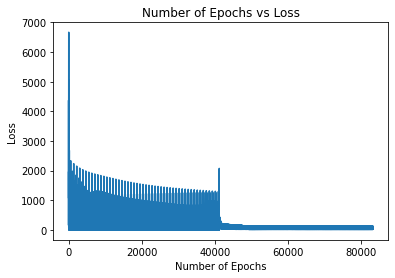

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
with torch.no_grad():
  plt.plot([*range(len(loss_list))],loss_list)

In [ ]:
#Predict the output
prediction = net_batch(input_test_tensor_normalized)   

In [ ]:
from torch.autograd import Variable
prediction = Variable(prediction, requires_grad=True)
prediction = prediction.detach().numpy()

#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': prediction.flatten()}, index = [*range(0,206)])
bgd_diff.head(5)

,Actual value,Predicted value
0,26.062193,30.091927
1,10.354551,5.007804
2,79.296635,77.850136
3,74.987410,58.061848
4,9.694722,11.828295


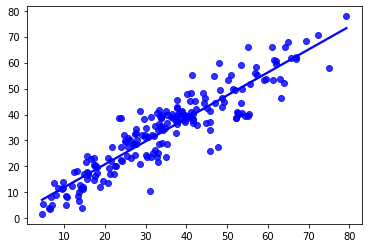

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=prediction, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), prediction.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), prediction.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 84.25
Mean Absolute Error: 4.852310500017385
Mean Square Error: 41.472361677298586
Root Mean Square Error: 6.439903856215447



---
\
**Metrics Comparison**

                  Batch Gradient Descent with Nesterov Accelerated Gradient Descent   

                                      Python Implementation               Pytroch Implementation
    R squared                                59.55                                81.64
    Mean Absolute Error                      8.25913                             5.25094
    Mean Square Error                       106.540924                            48.35413
    Root Mean Square Error                   10.321866                              6.95371   

# Gradient Descent with Momentum - Python Implementation

In [ ]:
def batch_gradient_descent_with_momentum(x, y, theta, criterion, number_of_iterations, learning_rate, gamma, print_execution_status = True):
    loss_history=[] #Loss history tracker
    gradient = np.zeros([9,1]) #Gradient output 
    vt = np.zeros(theta.shape[0]).reshape(-1,1) #Velocity

    for i in range(number_of_iterations):
        # predict and calculate loss
        f = create_function(theta) # create the current function
        y_predicted = f(x) # predict our entire x
        loss = criterion(y,y_predicted) # calculate the error
        loss_history.append(loss[0])

        #perform optimization
        for j in range(0, theta.shape[0]):
          weight = compute_weights(x[:,j].reshape(-1, 1),y,y_predicted) #calculate weight for whole examples every iteration
          gradient[j] = weight

        vt = gamma * vt + learning_rate * gradient #Compute momentum
        theta = theta - vt #adjust m and b

        if i%1000==0 and print_execution_status:
            print("Current Epoch: {}, Current Loss: {}".format(i,loss[0]))
   
    return theta,loss_history

In [ ]:
theta = np.zeros([9,1])
num_epochs = 15000
learning_rate = 0.01
gamma = 0.9
ideal_theta, loss_history = batch_gradient_descent_with_momentum(input_train_vector_normalized, output_train_vector, theta, mse, num_epochs, learning_rate, gamma)

Current Epoch: 0, Current Loss: [1585.52485081]
Current Epoch: 1000, Current Loss: [114.07162818]
Current Epoch: 2000, Current Loss: [111.27419879]
Current Epoch: 3000, Current Loss: [110.68252629]
Current Epoch: 4000, Current Loss: [110.54719166]
Current Epoch: 5000, Current Loss: [110.51165765]
Current Epoch: 6000, Current Loss: [110.49869101]
Current Epoch: 7000, Current Loss: [110.4910458]
Current Epoch: 8000, Current Loss: [110.48480649]
Current Epoch: 9000, Current Loss: [110.47907164]
Current Epoch: 10000, Current Loss: [110.4736274]
Current Epoch: 11000, Current Loss: [110.46841758]
Current Epoch: 12000, Current Loss: [110.46342248]
Current Epoch: 13000, Current Loss: [110.45863103]
Current Epoch: 14000, Current Loss: [110.45403442]


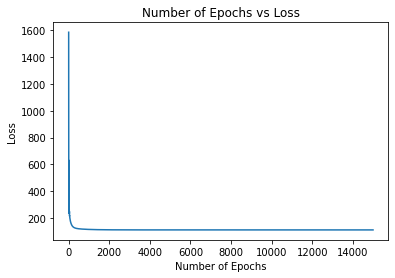

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
plt.plot(np.arange(num_epochs),loss_history)

In [ ]:
print("Ideal Theta: ", ideal_theta)

Ideal Theta:  [[ -4.04793861]
 [ 60.50545295]
 [ 36.01910321]
 [ 16.29793847]
 [-45.01258377]
 [  9.0585871 ]
 [ 15.33585001]
 [ 12.34207143]
 [ 41.99193787]]


In [ ]:
ideal_function = create_function(ideal_theta)
output_pred = ideal_function(input_test_vector_normalized)

In [ ]:
#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': output_pred.flatten()}, index = [*range(0,206)])
bgd_diff.head()

,Actual value,Predicted value
0,26.062193,38.690776
1,10.354551,17.252668
2,79.296635,63.956210
3,74.987410,54.299510
4,9.694722,28.136931


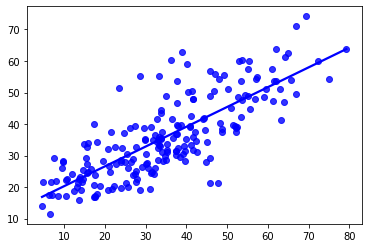

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=output_pred, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), output_pred.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), output_pred.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 61.75
Mean Absolute Error: 8.066736109517011
Mean Square Error: 100.75525151565948
Root Mean Square Error: 10.037691543161678


# Gradient Descent with momentum - Pytorch Implementation

In [ ]:
net_all = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
optimizer_all = torch.optim.SGD(net_all.parameters(), lr=1e-6, momentum= 0.9)
setRandomState()

loss_list = []
for t in range(500):
    prediction = net_all(input_train_tensor)   
    loss = criterion(prediction, output_train_tensor)
    loss_list.append(loss)
    optimizer_all.zero_grad()
    loss.backward()
    optimizer_all.step()
    print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="")

epoch: 499	Loss =  113.214

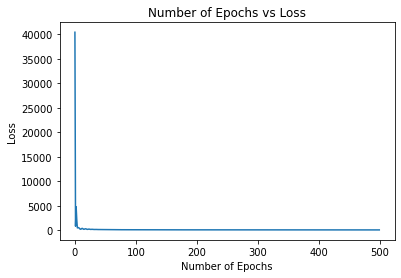

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
with torch.no_grad():
  plt.plot([*range(500)],loss_list)

In [ ]:
#Convert Numpy to Tensor
input_test_tensor = torch.from_numpy(np.float32(input_test_vector))
output_test_tensor = torch.from_numpy(np.float32(output_test_vector))

#Predict the output
prediction = net_all(input_test_tensor)   

In [ ]:
from torch.autograd import Variable
prediction = Variable(prediction, requires_grad=True)
prediction = prediction.detach().numpy()

#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': prediction.flatten()}, index = [*range(0,206)])
bgd_diff.head(5)

,Actual value,Predicted value
0,26.062193,39.282955
1,10.354551,16.036671
2,79.296635,60.163086
3,74.987410,54.667103
4,9.694722,26.545706


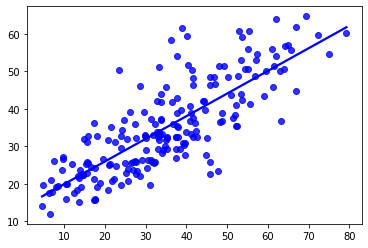

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=prediction, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), prediction.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), prediction.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 64.01
Mean Absolute Error: 7.790794782856678
Mean Square Error: 94.7794571923295
Root Mean Square Error: 9.735474163713317


---
\
**Metrics Comparison**

                                            Batch Gradient Descent with Momentum   

                                      Python Implementation               Pytroch Implementation
    R squared                                61.75                                74.56
    Mean Absolute Error                      8.0657                              6.43919
    Mean Square Error                      100.735822                            67.01061
    Root Mean Square Error                  10.03672                             8.18600   

# Nesterov Accelerated Gradient Descent - Python Implementation

In [ ]:
def batch_gradient_descent_with_nesterov(x, y, theta, criterion, number_of_iterations, learning_rate, gamma, print_execution_status = True):
    loss_history=[] #Loss history tracker
    gradient = np.zeros([9,1]) #Gradient output 
    vt = np.zeros(theta.shape[0]).reshape(-1,1) #Velocity

    for i in range(number_of_iterations):
        vt = gamma * vt + learning_rate * gradient #Compute momentum for t+1
        theta = theta - vt #adjust m and b

        # predict and calculate loss
        f = create_function(theta) # create the current function
        y_predicted = f(x) # predict our entire x
        loss = criterion(y,y_predicted) # calculate the error
        loss_history.append(loss[0])

        #perform optimization
        for j in range(0, theta.shape[0]):
          weight = compute_weights(x[:,j].reshape(-1, 1),y,y_predicted) #calculate weight for whole examples every iteration
          gradient[j] = weight

        if i%1000==0 and print_execution_status:
            print("Current Epoch: {}, Current Loss: {}".format(i,loss[0]))
   
    return theta,loss_history

In [ ]:
theta = np.zeros([9,1])
num_epochs = 15000
learning_rate = 0.01
gamma = 0.3
ideal_theta, loss_history = batch_gradient_descent_with_nesterov(input_train_vector_normalized, output_train_vector, theta, mse, num_epochs, learning_rate, gamma)

Current Epoch: 0, Current Loss: [1585.52485081]
Current Epoch: 1000, Current Loss: [148.37865343]
Current Epoch: 2000, Current Loss: [126.60362646]
Current Epoch: 3000, Current Loss: [120.48592029]
Current Epoch: 4000, Current Loss: [117.80215619]
Current Epoch: 5000, Current Loss: [116.15808619]
Current Epoch: 6000, Current Loss: [114.97358105]
Current Epoch: 7000, Current Loss: [114.06541803]
Current Epoch: 8000, Current Loss: [113.35288618]
Current Epoch: 9000, Current Loss: [112.78852615]
Current Epoch: 10000, Current Loss: [112.33942339]
Current Epoch: 11000, Current Loss: [111.98100833]
Current Epoch: 12000, Current Loss: [111.69436312]
Current Epoch: 13000, Current Loss: [111.46471564]
Current Epoch: 14000, Current Loss: [111.28044659]


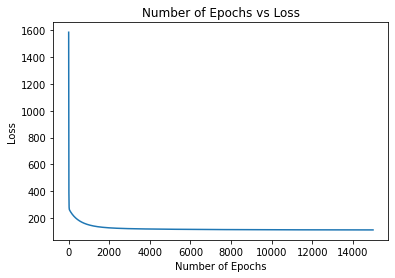

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
plt.plot(np.arange(num_epochs),loss_history)

In [ ]:
print("Ideal Theta: ", ideal_theta)

Ideal Theta:  [[  4.0711848 ]
 [ 55.80771692]
 [ 32.10973961]
 [ 13.478981  ]
 [-38.84135686]
 [ 14.23671529]
 [ 11.58089506]
 [  4.24577189]
 [ 40.96421758]]


In [ ]:
ideal_function = create_function(ideal_theta)
output_pred = ideal_function(input_test_vector_normalized)

In [ ]:
#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': output_pred.flatten()}, index = [*range(0,206)])
bgd_diff.head()

,Actual value,Predicted value
0,26.062193,38.726465
1,10.354551,17.399450
2,79.296635,63.022160
3,74.987410,51.173437
4,9.694722,27.293563


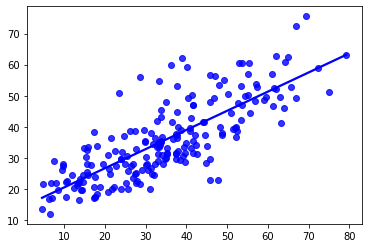

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=output_pred, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), output_pred.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), output_pred.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), output_pred.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 61.91
Mean Absolute Error: 8.024365307146908
Mean Square Error: 100.33194656297898
Root Mean Square Error: 10.016583577396986


---

# Nesterov Accelerated Gradient Descent - Pytorch Implementation

In [ ]:
net_all = GradientDescent(n_feature=9, n_hidden=9, n_output=1) 
optimizer_all = torch.optim.SGD(net_all.parameters(), lr=1e-6, momentum= 0.9, nesterov= True)
setRandomState()

loss_list = []
for t in range(500):
    prediction = net_all(input_train_tensor)   
    loss = criterion(prediction, output_train_tensor)
    loss_list.append(loss)
    optimizer_all.zero_grad()
    loss.backward()
    optimizer_all.step()
    print('\repoch: {}\tLoss =  {:.3f}'.format(t, loss), end="")

epoch: 499	Loss =  115.731

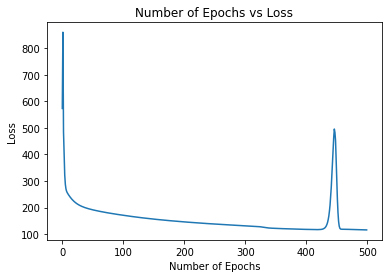

In [ ]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Number of Epochs vs Loss")
with torch.no_grad():
  plt.plot([*range(500)],loss_list)

In [ ]:
#Convert Numpy to Tensor
input_test_tensor = torch.from_numpy(np.float32(input_test_vector))
output_test_tensor = torch.from_numpy(np.float32(output_test_vector))

#Predict the output
prediction = net_all(input_test_tensor)   

In [ ]:
from torch.autograd import Variable
prediction = Variable(prediction, requires_grad=True)
prediction = prediction.detach().numpy()

#Actual value and the predicted value
bgd_diff = pd.DataFrame({'Actual value': output_test_vector.flatten(), 'Predicted value': prediction.flatten()}, index = [*range(0,206)])
bgd_diff.head(5)

,Actual value,Predicted value
0,26.062193,40.343460
1,10.354551,16.882790
2,79.296635,58.335411
3,74.987410,55.890305
4,9.694722,26.754524


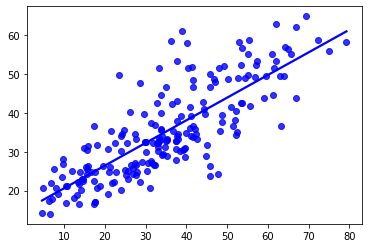

In [ ]:
#Plot between Actual value and the predicted value
sns.regplot(x=output_test_vector, y=prediction, ci=None, color="b")

In [ ]:
meanAbErr = metrics.mean_absolute_error(output_test_vector.flatten(), prediction.flatten())
meanSqErr = metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten())
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(output_test_vector.flatten(), prediction.flatten()))
accuracy = metrics.r2_score(output_test_vector.flatten(), prediction.flatten())

print('R squared: {:.2f}'.format(accuracy*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 63.77
Mean Absolute Error: 7.75161412483936
Mean Square Error: 95.42379854658344
Root Mean Square Error: 9.768510559270714



---
\
**Metrics Comparison**

                  Batch Gradient Descent with Nesterov Accelerated Gradient Descent   

                                      Python Implementation               Pytroch Implementation
    R squared                                61.91                                63.74
    Mean Absolute Error                      8.023451                              7.74914
    Mean Square Error                       100.31144                            95.50514
    Root Mean Square Error                   10.0115                               9.77267   